### Deliverable 3: Optimize the Model - Continued
    
#### Follow up to confirm that the "T3" application type was overfitting our initial model


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.

application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_count = application_df.APPLICATION_TYPE.value_counts()
application_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

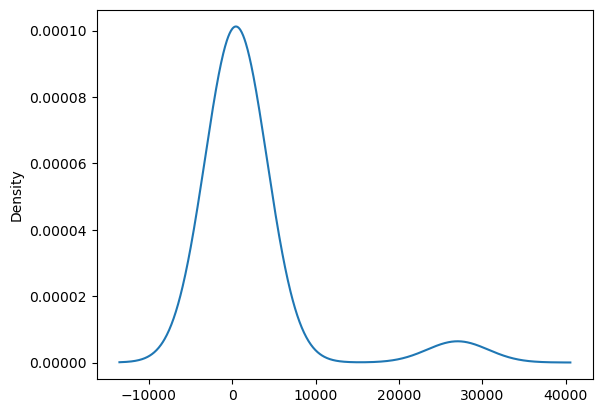

In [5]:
# Visualize the value counts of APPLICATION_TYPE

application_type_count.plot.density()

In [6]:
# Filter Dataset by "APPLICATION TYPE" values. the T3 applications heavily bias the data

split_df_t3 = application_df[application_df['APPLICATION_TYPE']=='T3']
split_df_other = application_df[application_df['APPLICATION_TYPE']!='T3']
len(split_df_other)


7262

In [7]:
# Look at CLASSIFICATION value counts for binning

split_class_type_count = split_df_t3.CLASSIFICATION.value_counts()
split_class_type_count.count()

71

In [8]:
# Look at CLASSIFICATION value counts for binning

split_df_t3.CLASSIFICATION.value_counts()

C1000    12909
C2000     5189
C1200     4825
C2100     1883
C7000      777
         ...  
C2170        1
C4120        1
C2561        1
C1245        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

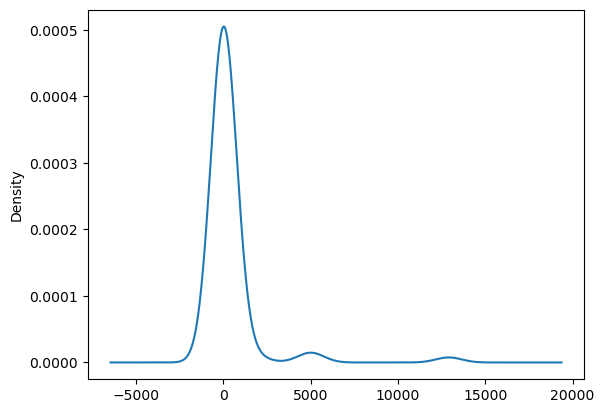

In [9]:
# Visualize the value counts of CLASSIFICATION
split_class_type_count.plot.density()

In [10]:
# Bin the classification type

replace_class = list(split_class_type_count[split_class_type_count<1000].index)

# Replace in dataframe
for cls in replace_class:
    split_df_t3.CLASSIFICATION = split_df_t3.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
split_df_t3.CLASSIFICATION.value_counts()


/Applications/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


C1000    12909
C2000     5189
C1200     4825
Other     2231
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# All data in this set is the same value for APPLICATION_TYPE so the column can be dropped

split_df_t3 = split_df_t3.drop(columns='APPLICATION_TYPE')

In [12]:
# Generate our categorical variable lists

application_cat = split_df_t3.dtypes[split_df_t3.dtypes == "object"].index.tolist()
application_cat

['AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(split_df_t3[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df

/Applications/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27033,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27034,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27035,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
merged_df = split_df_t3.merge(encode_df,on=split_df_t3.index).drop(columns=application_cat)
merged_df

,key_0,STATUS,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,1,6692,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,1,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6,1,31452,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27032,34288,1,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27033,34289,1,20197,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27034,34293,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27035,34296,1,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays

X= merged_df.drop(columns=['key_0','IS_SUCCESSFUL'])
y= merged_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=52)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
len(X_train_scaled[0])

33

### Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 30



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features, activation='relu')
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu')
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=15, activation='relu')
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                2040      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 4,351
Trainable params: 4,351
Non-trainable params: 0
_________________________________________________________________


2023-01-28 00:57:16.940485: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-28 00:57:16.940970: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [26]:
# # Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Optimization2_checkpoints/",exist_ok=True)
checkpoint_path = "Optimization2_checkpoints/weights.{epoch:02d}.hdf5"

In [27]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [29]:
# Train the model

fit_model = nn.fit(pd.DataFrame(X_train_scaled),y_train,epochs=50,callbacks=[cp_callback])

Train on 20277 samples
Epoch 1/50
20277/20277 [==============================] - 2s 90us/sample - loss: 0.5647 - accuracy: 0.7230
Epoch 2/50
20277/20277 [==============================] - 1s 63us/sample - loss: 0.5644 - accuracy: 0.7233
Epoch 3/50
20277/20277 [==============================] - 1s 63us/sample - loss: 0.5633 - accuracy: 0.7232
Epoch 4/50
20277/20277 [==============================] - 1s 63us/sample - loss: 0.5625 - accuracy: 0.7249
Epoch 5/50
19968/20277 [============================>.] - ETA: 0s - loss: 0.5622 - accuracy: 0.7245
Epoch 00005: saving model to Optimization2_checkpoints/weights.05.hdf5
20277/20277 [==============================] - 1s 65us/sample - loss: 0.5626 - accuracy: 0.7243
Epoch 6/50
20277/20277 [==============================] - 1s 64us/sample - loss: 0.5619 - accuracy: 0.7256
Epoch 7/50
20277/20277 [==============================] - 1s 63us/sample - loss: 0.5617 - accuracy: 0.7252
Epoch 8/50
20277/20277 [==============================] - 1s 63us/sa

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(pd.DataFrame(X_test_scaled),y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6760/6760 - 0s - loss: 0.5717 - accuracy: 0.7198
Loss: 0.5717447816972901, Accuracy: 0.7198224663734436


In [31]:
tf.keras.models.save_model(nn,"Optimization2_checkpoints/AlphabetSoupCharity.h5")

### Summary

This model fails to achieve the target score of the analysis, a goal of 75% accuracy. This model when ran through several iterations with various node and layer counts only got an accuracy score of between 71-72%. 
This outcome confirms that the "T3" "APPLICATION_TYPE" data was overfitting our initial model.